# Social Media Sentiment Analysis

To perform social media sentiment analysis on EVs, I took up a dataset from Kaggle which contained Youtube comments of people around the globe. Kaggle is a platform for data scientists which contains numerous datasets on any topic we wish to search for. For doing that, in the below cell, I imported several essential Python libraries required for data manipulation, natural language processing (NLP), and machine learning.

In [2]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



For downloading the dataset, this cell uses the Kaggle API to download a dataset titled "EV Talk YouTube Sentiments Unveiled" from the Kaggle repository. The dataset is saved locally for further processing.

In [3]:
!kaggle datasets download -d kanchana1990/ev-talk-youtube-sentiments-unveiled

Dataset URL: https://www.kaggle.com/datasets/kanchana1990/ev-talk-youtube-sentiments-unveiled
License(s): other
ev-talk-youtube-sentiments-unveiled.zip: Skipping, found more recently modified local copy (use --force to force download)


For extracting the dataset, this cell takes out the contents of the downloaded zip file into a specified directory named **dataset-directory** using Python's built-in **zipfile** module. This allows us to access the dataset files directly.

In [4]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset-directory')

In the next step, we load the dataset into a pandas DataFrame from the CSV file named **youtube_comments_full_anonymized.csv** located in the extracted directory. This DataFrame (df) will be used for all subsequent data manipulation and analysis.

In [5]:
df = pd.read_csv('dataset-directory/youtube_comments_full_anonymized.csv')


Here, the **head()** method is used to display the first five rows of the DataFrame. This allows us to quickly inspect the data structure and contents to ensure it loaded correctly.

In [6]:
df.head()


,Comment,Anonymized Author,Published At,Likes,Reply Count
0,Ya this is an good invention that we drive ev ...,667e8d19fa9123ecadb71631917bbbc2,2023-12-06T09:54:19Z,0,0
1,Let car be charged while you may drink a cup o...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:17:25Z,0,0
2,Is.that the car stops charhing better than up ...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:08:28Z,0,0
3,😂how much of invetsment of.this instead of a n...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:04:52Z,0,0
4,what will happen if an accident happens and a ...,e673dba59001bbeacd4ae6d6fa09f3f2,2023-12-04T15:47:42Z,0,0


As we can see above, we can see the first few rows of the dataset rendered in a csv file. This dataset contains information on the comments made by a particular user and the likes and the reply count associated with each of them. In the below cell, we define and apply a function to clean the text in the **Comment** column. This function converts the text to lowercase, removes numbers, non-alphanumeric characters and extra spaces. After this, the cleaned text is stored in a new column called **cleaned_comment**. This new column is also displayed along with the dataset.

In [7]:
# Function to clean the text data
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    return text

# Apply the function to the Comment column
df['cleaned_comment'] = df['Comment'].apply(clean_text)
df.head()


,Comment,Anonymized Author,Published At,Likes,Reply Count,cleaned_comment
0,Ya this is an good invention that we drive ev ...,667e8d19fa9123ecadb71631917bbbc2,2023-12-06T09:54:19Z,0,0,ya this is an good invention that we drive ev ...
1,Let car be charged while you may drink a cup o...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:17:25Z,0,0,let car be charged while you may drink a cup o...
2,Is.that the car stops charhing better than up ...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:08:28Z,0,0,is that the car stops charhing better than up ...
3,😂how much of invetsment of.this instead of a n...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:04:52Z,0,0,how much of invetsment of this instead of a n...
4,what will happen if an accident happens and a ...,e673dba59001bbeacd4ae6d6fa09f3f2,2023-12-04T15:47:42Z,0,0,what will happen if an accident happens and a ...


This cell converts the cleaned text data into numerical features using the TF-IDF vectorization method. The vectorized data is stored in 'X' variable. Additionally, for simplicity, we define the sentiment as positive if the number of likes is greater than zero (1 for positive, 0 for negative), and store these labels in y. This assumption can be replaced with actual sentiment labels if available.

In [8]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_comment']).toarray()

# For demonstration purposes, let's assume the sentiment is positive if likes are greater than 0
# Replace this with the actual sentiment column if available
df['sentiment'] = df['Likes'].apply(lambda x: 1 if x > 0 else 0)
y = df['sentiment']


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [11]:
# Predict the sentiment on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)


Accuracy: 75.29%
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        64
           1       0.00      0.00      0.00        21

    accuracy                           0.75        85
   macro avg       0.38      0.50      0.43        85
weighted avg       0.57      0.75      0.65        85



D:\anaconda\envs\labelme_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\envs\labelme_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\envs\labelme_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# Function to calculate polarity and subjectivity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the cleaned_comment column and create new columns for polarity and subjectivity
df['polarity'], df['subjectivity'] = zip(*df['cleaned_comment'].apply(get_sentiment))

df.head()


,Comment,Anonymized Author,Published At,Likes,Reply Count,cleaned_comment,sentiment,polarity,subjectivity
0,Ya this is an good invention that we drive ev ...,667e8d19fa9123ecadb71631917bbbc2,2023-12-06T09:54:19Z,0,0,ya this is an good invention that we drive ev ...,0,0.041667,0.610648
1,Let car be charged while you may drink a cup o...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:17:25Z,0,0,let car be charged while you may drink a cup o...,0,0.100000,0.278571
2,Is.that the car stops charhing better than up ...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:08:28Z,0,0,is that the car stops charhing better than up ...,0,0.500000,0.500000
3,😂how much of invetsment of.this instead of a n...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:04:52Z,0,0,how much of invetsment of this instead of a n...,0,0.175000,0.425000
4,what will happen if an accident happens and a ...,e673dba59001bbeacd4ae6d6fa09f3f2,2023-12-04T15:47:42Z,0,0,what will happen if an accident happens and a ...,0,0.000000,0.357143


In [13]:
# Display summary statistics for polarity and subjectivity
df[['polarity', 'subjectivity']].describe()


,polarity,subjectivity
count,424.000000,424.000000
mean,0.090511,0.365949
std,0.281015,0.312195
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.400000
75%,0.200000,0.600000
max,1.000000,1.000000


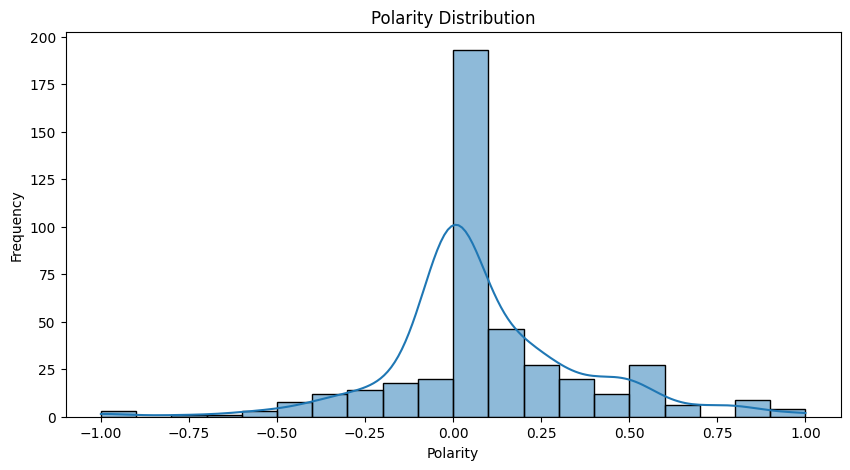

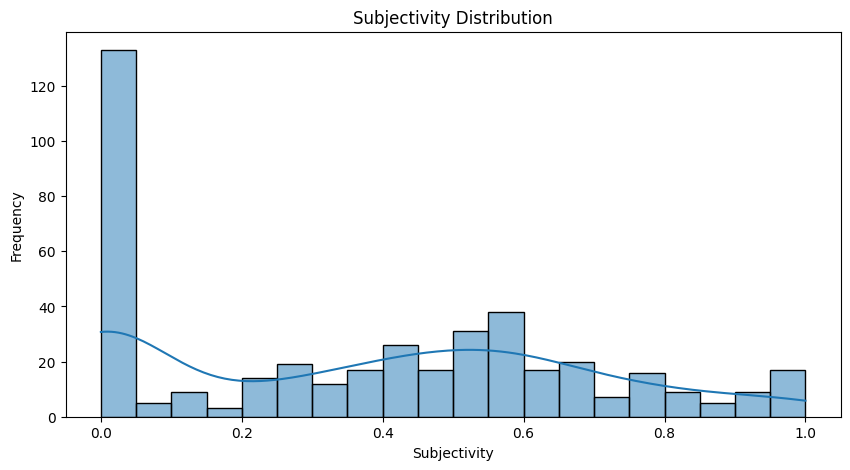

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for polarity
plt.figure(figsize=(10, 5))
sns.histplot(df['polarity'], bins=20, kde=True)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for subjectivity
plt.figure(figsize=(10, 5))
sns.histplot(df['subjectivity'], bins=20, kde=True)
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()
